In [135]:
# Import necessary libraries
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fiona

In [136]:
# Define file paths and layer names
filepaths = [
    '/Users/jorgecastillerotorre/Documents/TCD/GIS - Dissertation/Data/New_layers/Shortest Path Analysis/Train_shortest_path01.gpkg',
    '/Users/jorgecastillerotorre/Documents/TCD/GIS - Dissertation/Data/New_layers/Shortest Path Analysis/Car_shortest_path.gpkg',
    '/Users/jorgecastillerotorre/Documents/TCD/GIS - Dissertation/Data/New_layers/Shortest Path Analysis/Luas_shortest_path.gpkg',
    '/Users/jorgecastillerotorre/Documents/TCD/GIS - Dissertation/Data/New_layers/Shortest Path Analysis/Bike_shortest_path4.gpkg',
    '/Users/jorgecastillerotorre/Documents/TCD/GIS - Dissertation/Data/New_layers/Shortest Path Analysis/Bus_shortest_path.shp',
    '/Users/jorgecastillerotorre/Documents/TCD/GIS - Dissertation/Data/New_layers/Shortest Path Analysis/Bike_General_Shortest_path.gpkg'
]
layer_names = ['Train_shortest_path01', 'Car_shortest_path', 'Luas_shortest_path', 'Bike_shortest_path4', 'Bus_shortest_path', 'Bike_General_Shortest_path']
transport_names = ['Train', 'Car', 'Luas', 'Bike', 'Bus', 'Bike General']

all_data = []

El archivo /Users/jorgecastillerotorre/Documents/TCD/GIS - Dissertation/Data/New_layers/Shortest Path Analysis/Train_shortest_path01.gpkg existe. Procesando...
El archivo /Users/jorgecastillerotorre/Documents/TCD/GIS - Dissertation/Data/New_layers/Shortest Path Analysis/Car_shortest_path.gpkg existe. Procesando...
El archivo /Users/jorgecastillerotorre/Documents/TCD/GIS - Dissertation/Data/New_layers/Shortest Path Analysis/Luas_shortest_path.gpkg existe. Procesando...
El archivo /Users/jorgecastillerotorre/Documents/TCD/GIS - Dissertation/Data/New_layers/Shortest Path Analysis/Bike_shortest_path4.gpkg existe. Procesando...
El archivo /Users/jorgecastillerotorre/Documents/TCD/GIS - Dissertation/Data/New_layers/Shortest Path Analysis/Bus_shortest_path.shp existe. Procesando...
El archivo /Users/jorgecastillerotorre/Documents/TCD/GIS - Dissertation/Data/New_layers/Shortest Path Analysis/Bike_General_Shortest_path.gpkg existe. Procesando...


/var/folders/7h/pcmzytbd62sg67j9g0pt6n6c0000gn/T/ipykernel_6307/4281957054.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_selected['cost'] = gdf_selected['cost'].fillna(1)
/var/folders/7h/pcmzytbd62sg67j9g0pt6n6c0000gn/T/ipykernel_6307/4281957054.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_selected['cost'] = gdf_selected['cost'].fillna(1)
/var/folders/7h/pcmzytbd62sg67j9g0pt6n6c0000gn/T/ipykernel_6307/4281957054.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

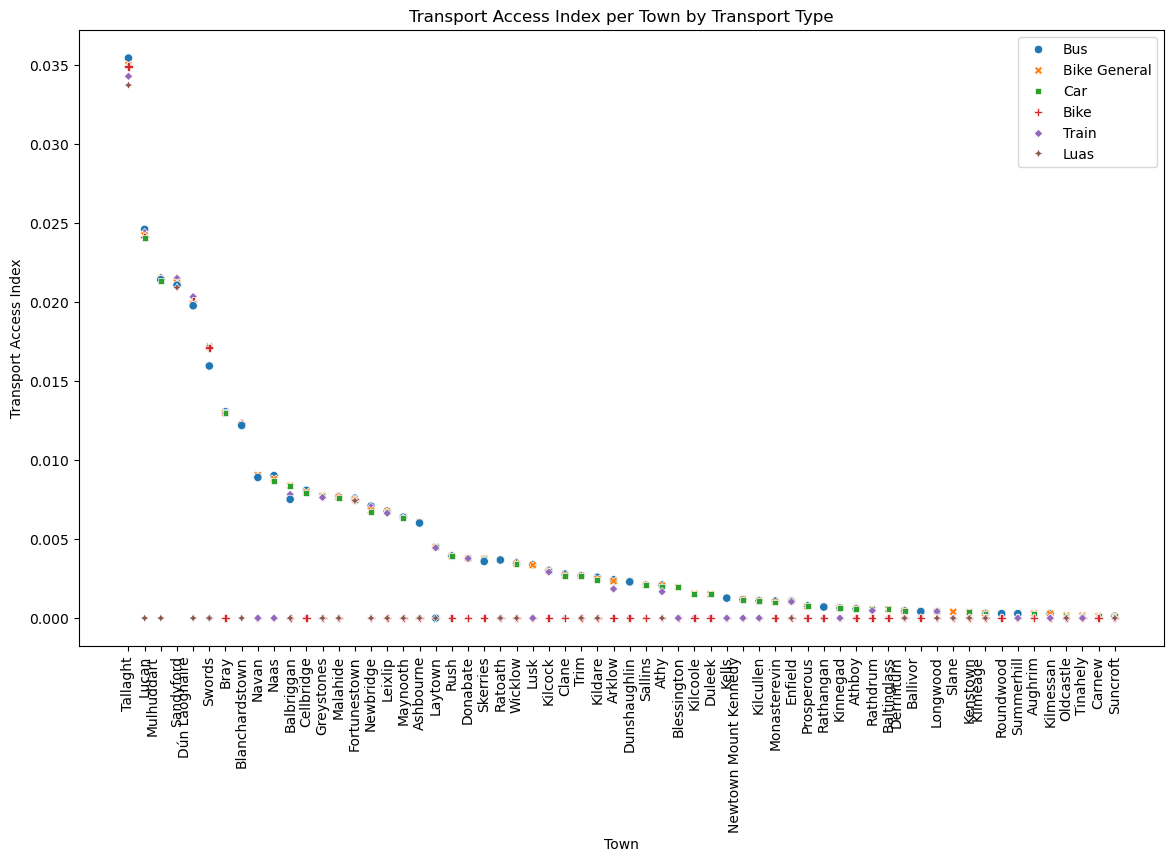

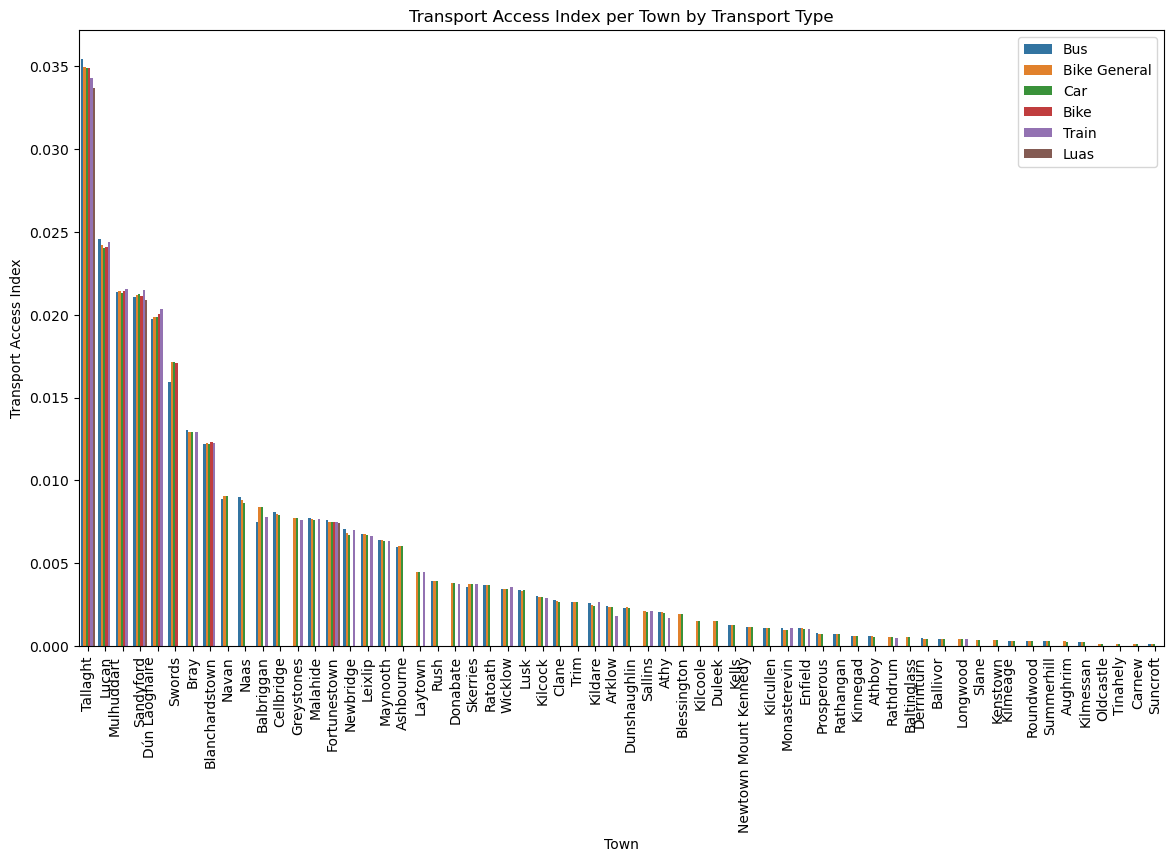

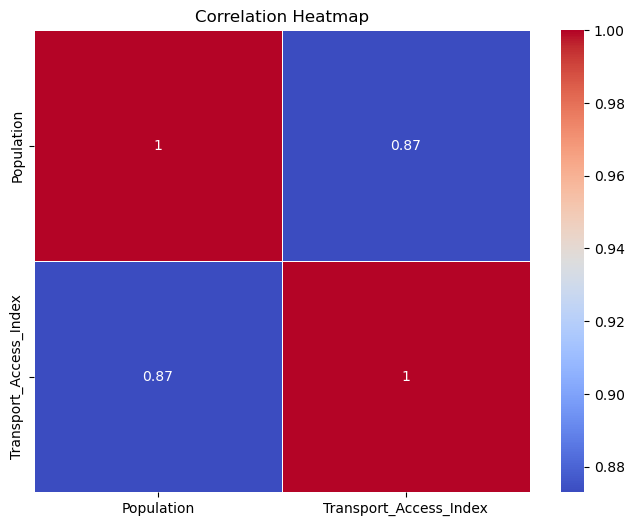

In [137]:

for filepath, layer_name, transport_name in zip(filepaths, layer_names, transport_names):
    if os.path.exists(filepath):
        print(f"El archivo {filepath} existe. Procesando...")
        if filepath.endswith('.shp'):
            gdf = gpd.read_file(filepath)
        else:
            gdf = gpd.read_file(filepath, layer=layer_name)
        
        gdf_selected = gdf[['Town', 'Population', 'cost']]
        
        gdf_selected['cost'] = gdf_selected['cost'].fillna(1)
        
        gdf_selected = gdf_selected[gdf_selected['Town'] != 'Dublin']

        gdf_selected['Transport_Access_Index'] = ((1 - gdf_selected['cost']) * gdf_selected['Population']) / 2082605

        gdf_selected['transport'] = transport_name

        all_data.append(gdf_selected)
    else:
        print(f"El archivo {filepath} no existe. Omitiendo...")

if all_data:
    combined_gdf = pd.concat(all_data, ignore_index=True)

    grouped_gdf = combined_gdf.groupby(['Town', 'transport']).agg({
        'Population': 'sum',
        'cost': 'mean',
        'Transport_Access_Index': 'sum'
    }).reset_index()

    grouped_gdf = grouped_gdf.sort_values(by='Transport_Access_Index', ascending=False)

    output_filepath = '/Users/jorgecastillerotorre/Documents/TCD/GIS - Dissertation/Data/New_layers/Shortest Path Analysis/Shortest_Path_Analysis.csv'
    grouped_gdf.to_csv(output_filepath, index=False)

    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=grouped_gdf, x='Town', y='Transport_Access_Index', hue='transport', style='transport')
    plt.xlabel('Town')
    plt.ylabel('Transport Access Index')
    plt.title('Transport Access Index per Town by Transport Type')
    plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    plt.show()

    plt.figure(figsize=(14, 8))
    sns.barplot(data=grouped_gdf, x='Town', y='Transport_Access_Index', hue='transport', order=grouped_gdf['Town'])
    plt.xlabel('Town')
    plt.ylabel('Transport Access Index')
    plt.title('Transport Access Index per Town by Transport Type')
    plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    plt.show()

    corr_matrix = grouped_gdf[['Population', 'Transport_Access_Index']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No se procesaron archivos. Verifica las rutas de los archivos.")

In [138]:
pd.set_option('display.max_rows', None)
gdf_selected

,Town,Population,cost,Transport_Access_Index,transport
1,Newbridge,24366,0.418597,0.006802,Bike General
2,Naas,26180,0.300541,0.008793,Bike General
3,Athy,11035,0.612566,0.002053,Bike General
4,Arklow,13399,0.635109,0.002348,Bike General
5,Maynooth,17259,0.228876,0.006390,Bike General
6,Kilcock,8674,0.284322,0.002981,Bike General
7,Navan,33886,0.444093,0.009045,Bike General
8,Trim,9563,0.418101,0.002672,Bike General
9,Ratoath,10007,0.230348,0.003698,Bike General
10,Dunshaughlin,6644,0.269109,0.002332,Bike General


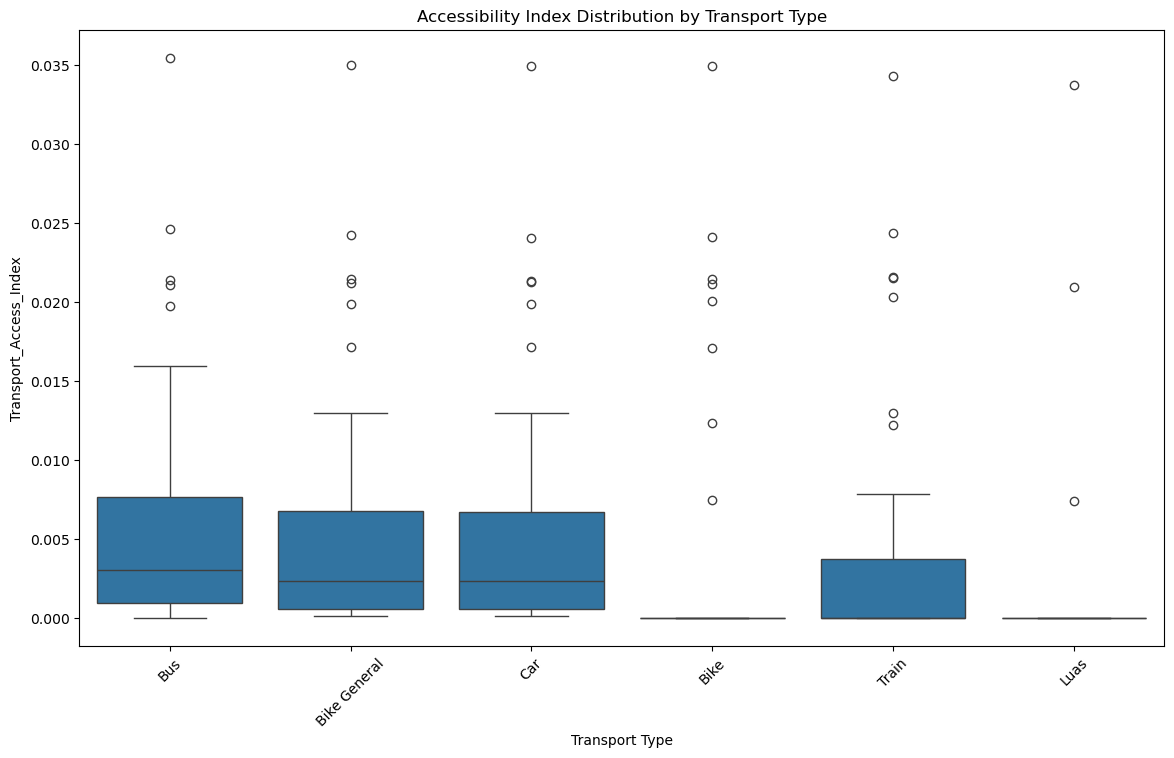

In [139]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=grouped_gdf, x='transport', y='Transport_Access_Index')
plt.xlabel('Transport Type')
plt.ylabel('Transport_Access_Index')
plt.title('Accessibility Index Distribution by Transport Type')
plt.xticks(rotation=45)
plt.show()

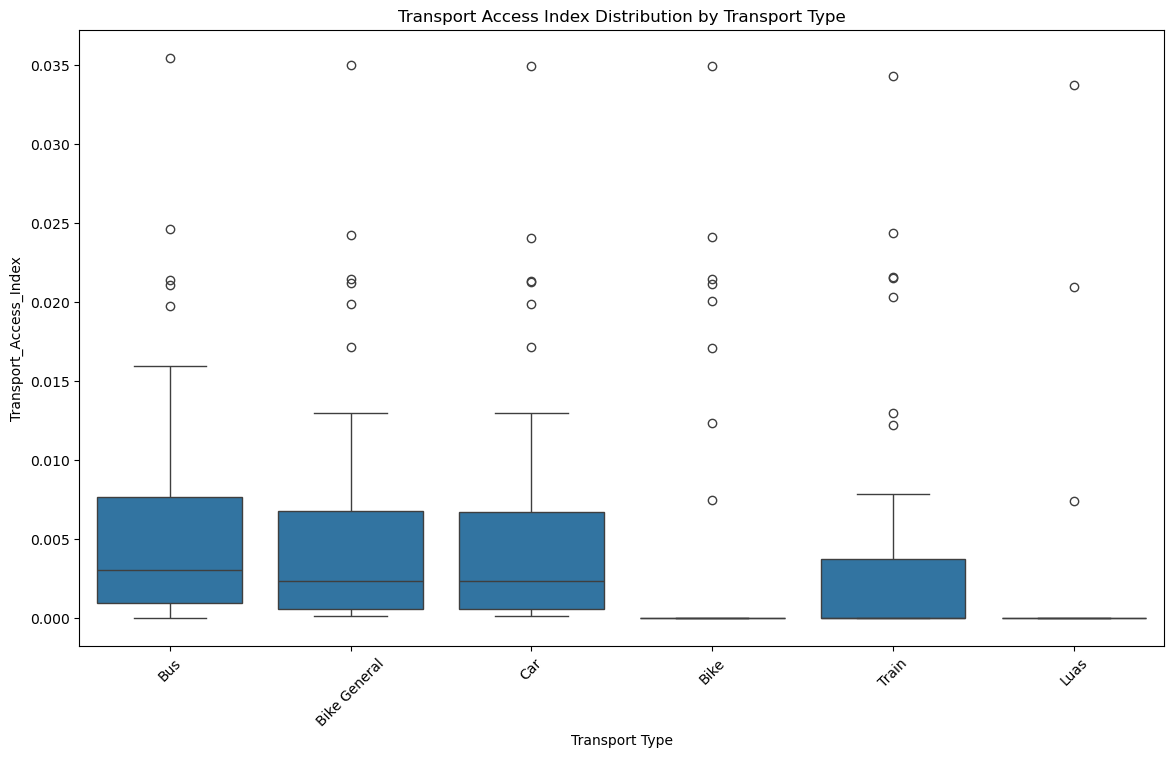

In [141]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=grouped_gdf, x='transport', y='Transport_Access_Index')
plt.xlabel('Transport Type')
plt.ylabel('Transport_Access_Index')
plt.title('Transport Access Index Distribution by Transport Type')
plt.xticks(rotation=45)
plt.show()

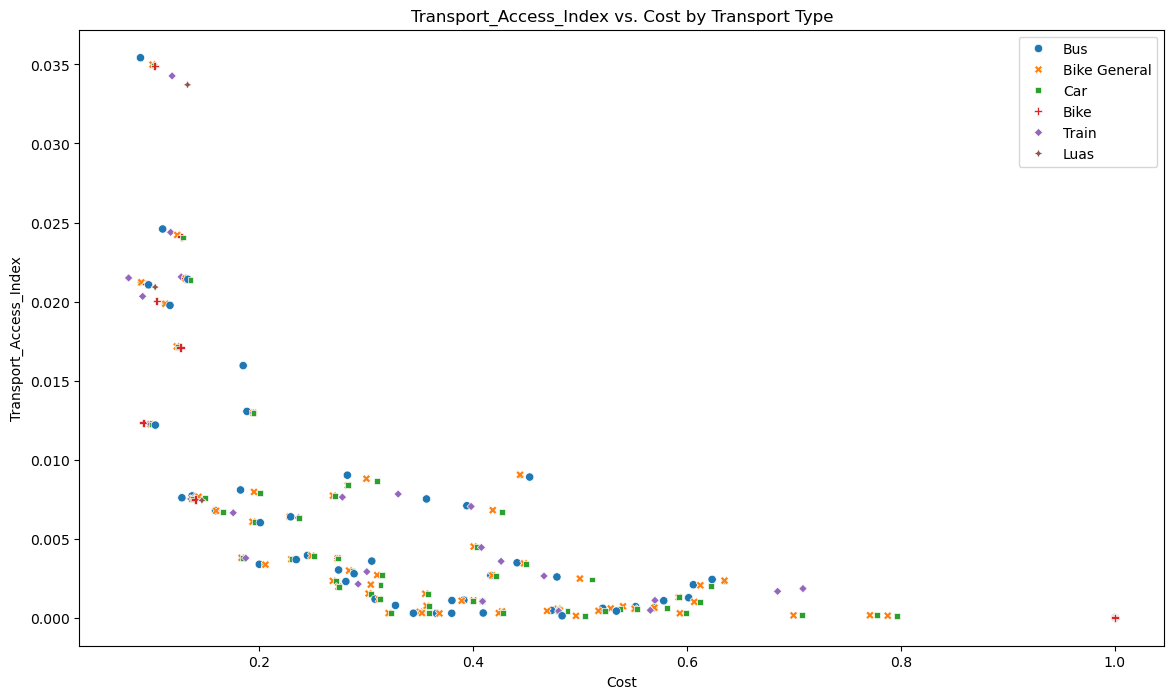

In [143]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=grouped_gdf, x='cost', y='Transport_Access_Index', hue='transport', style='transport')
plt.xlabel('Cost')
plt.ylabel('Transport_Access_Index')
plt.title('Transport_Access_Index vs. Cost by Transport Type')
plt.legend(loc='upper right')
plt.show()

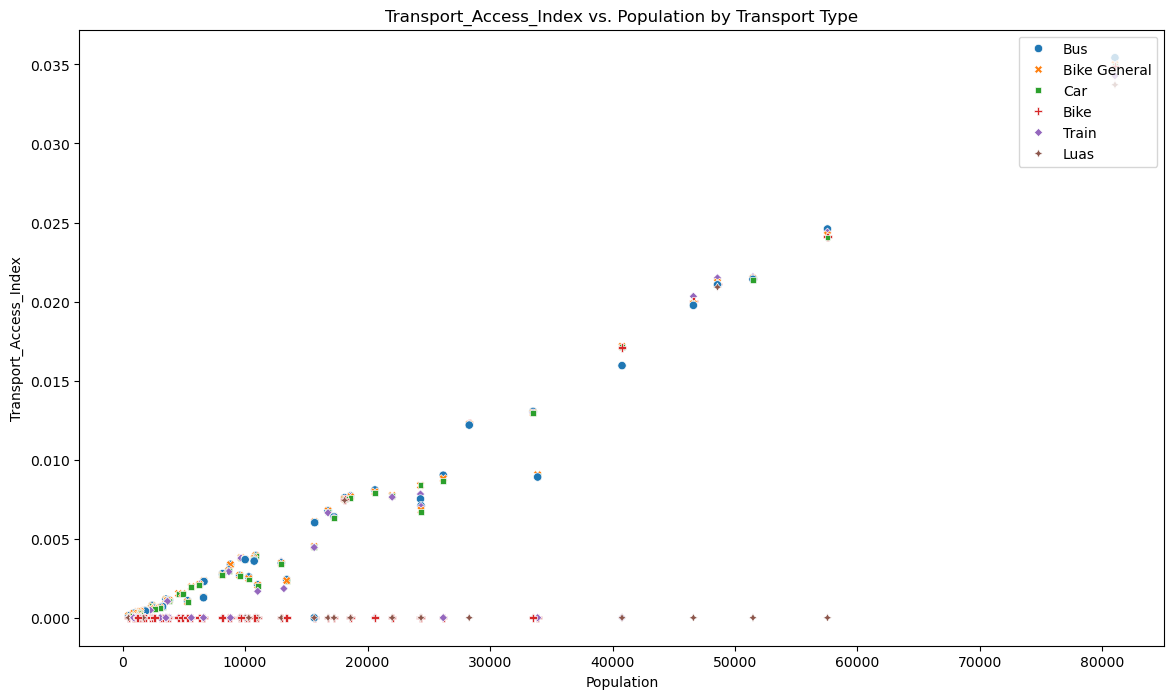

In [144]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=grouped_gdf, x='Population', y='Transport_Access_Index', hue='transport', style='transport')
plt.xlabel('Population')
plt.ylabel('Transport_Access_Index')
plt.title('Transport_Access_Index vs. Population by Transport Type')
plt.legend(loc='upper right')
plt.show()

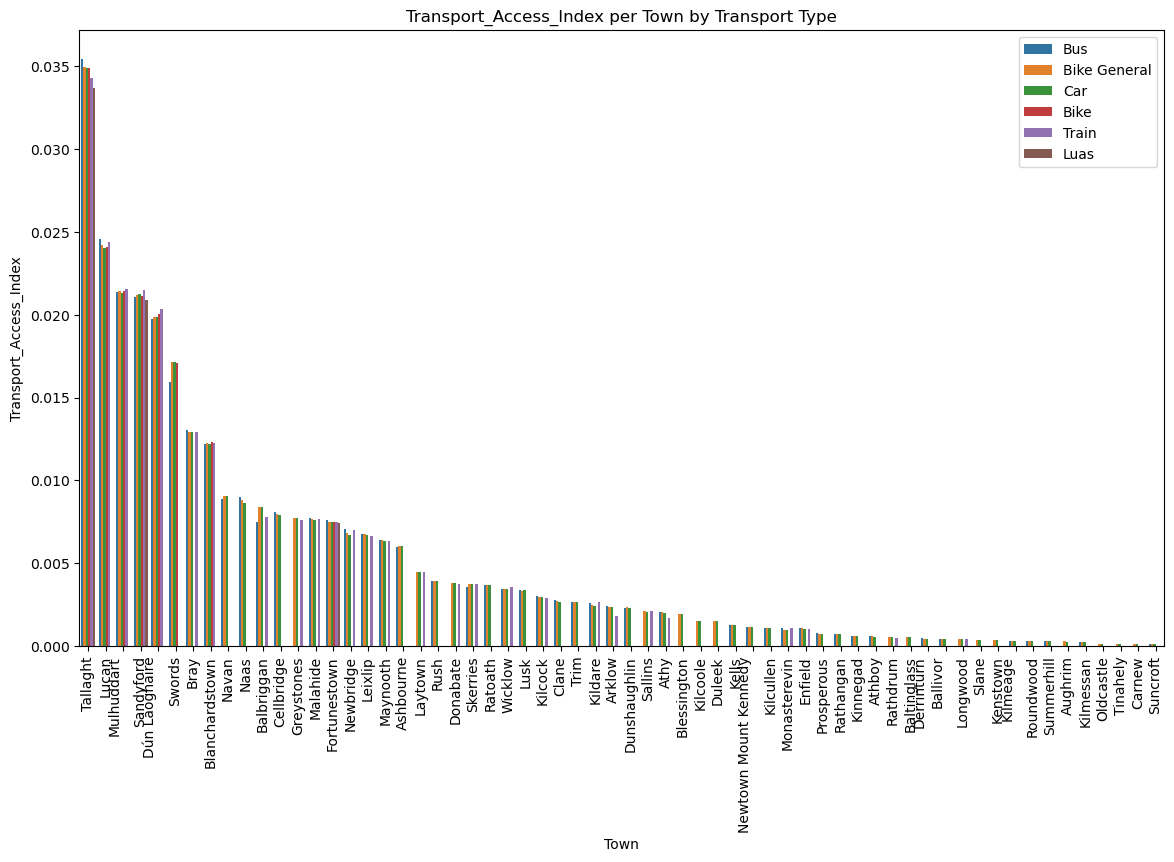

In [145]:
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_gdf, x='Town', y='Transport_Access_Index', hue='transport')
plt.xlabel('Town')
plt.ylabel('Transport_Access_Index')
plt.title('Transport_Access_Index per Town by Transport Type')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

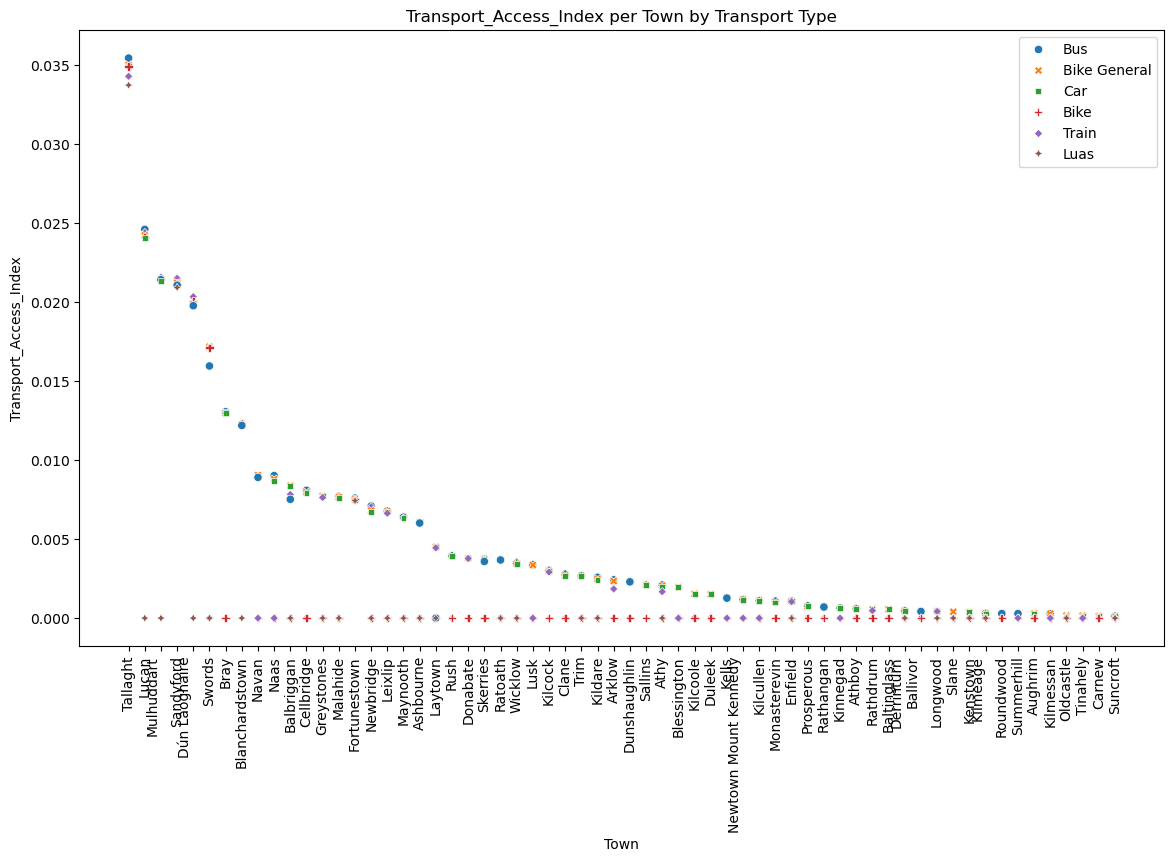

In [147]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=grouped_gdf, x='Town', y='Transport_Access_Index', hue='transport', style='transport')
plt.xlabel('Town')
plt.ylabel('Transport_Access_Index')
plt.title('Transport_Access_Index per Town by Transport Type')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

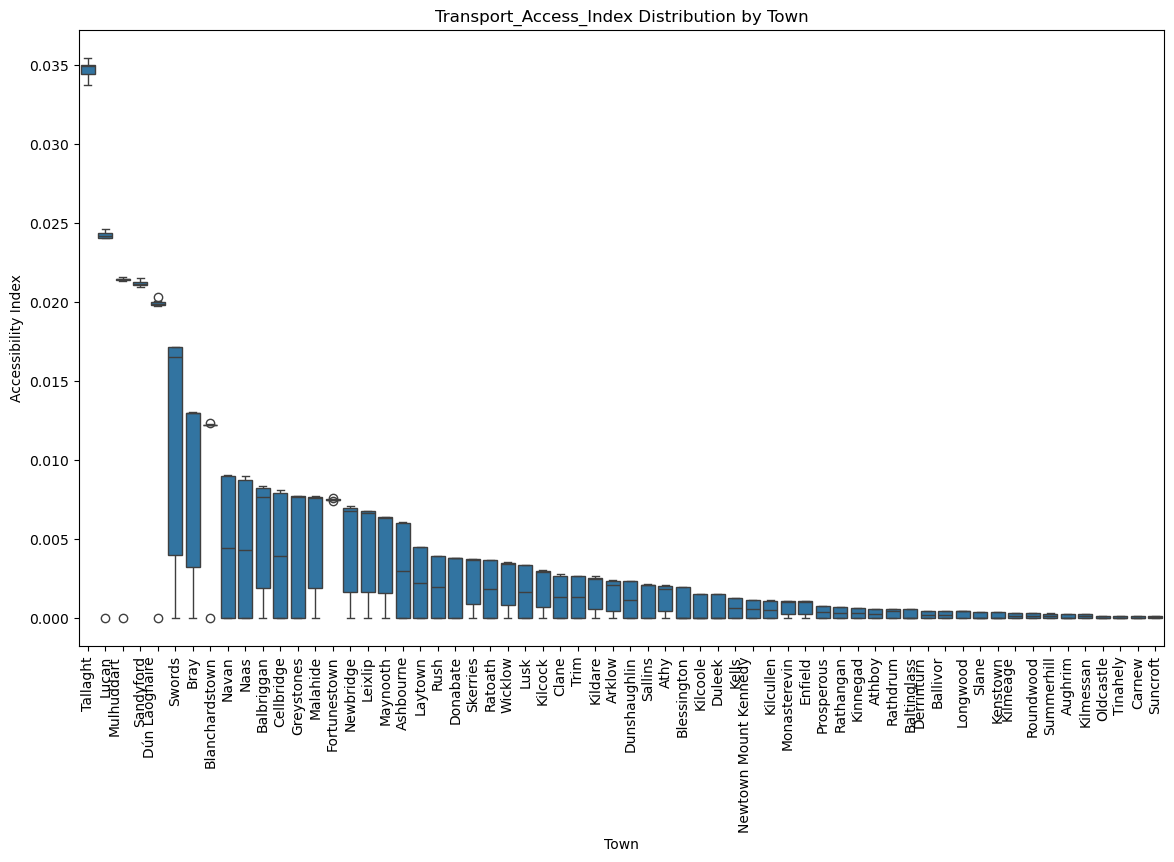

In [148]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=grouped_gdf, x='Town', y='Transport_Access_Index')
plt.xlabel('Town')
plt.ylabel('Accessibility Index')
plt.title('Transport_Access_Index Distribution by Town')
plt.xticks(rotation=90)
plt.show()

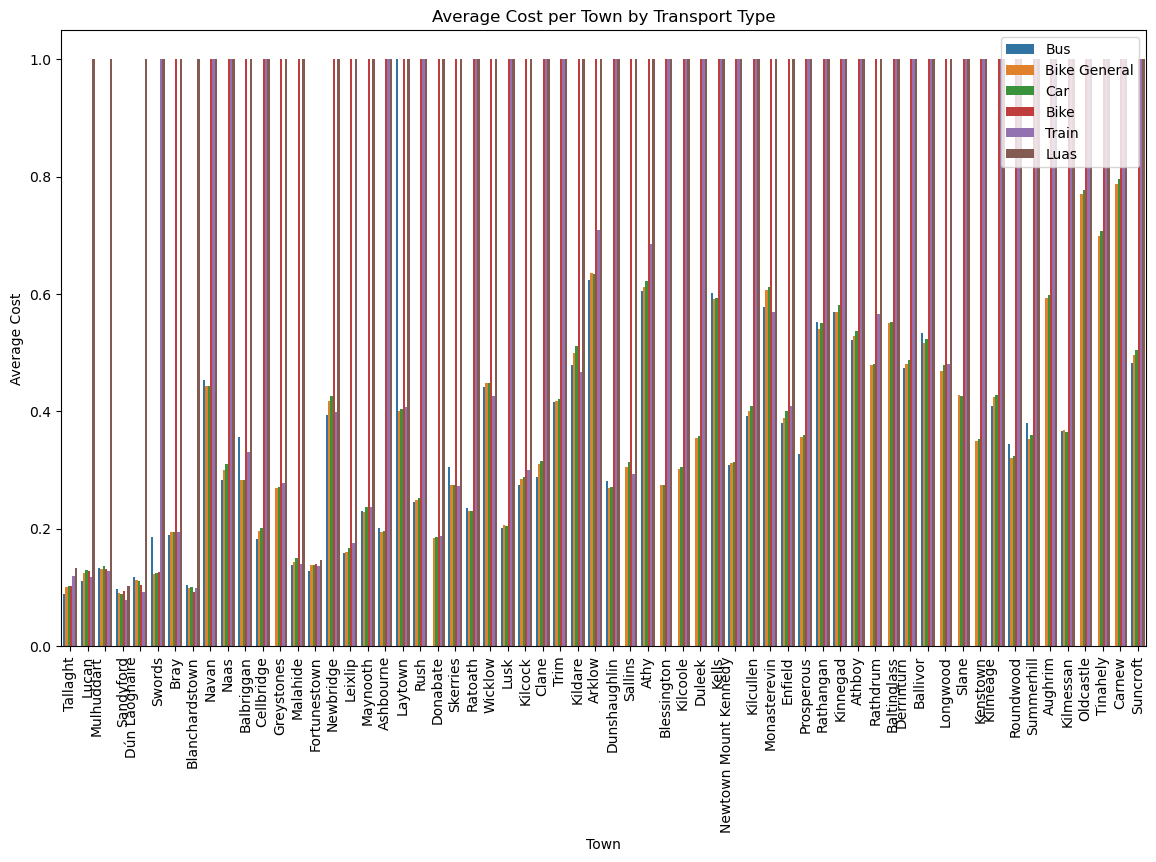

In [149]:
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_gdf, x='Town', y='cost', hue='transport')
plt.xlabel('Town')
plt.ylabel('Average Cost')
plt.title('Average Cost per Town by Transport Type')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

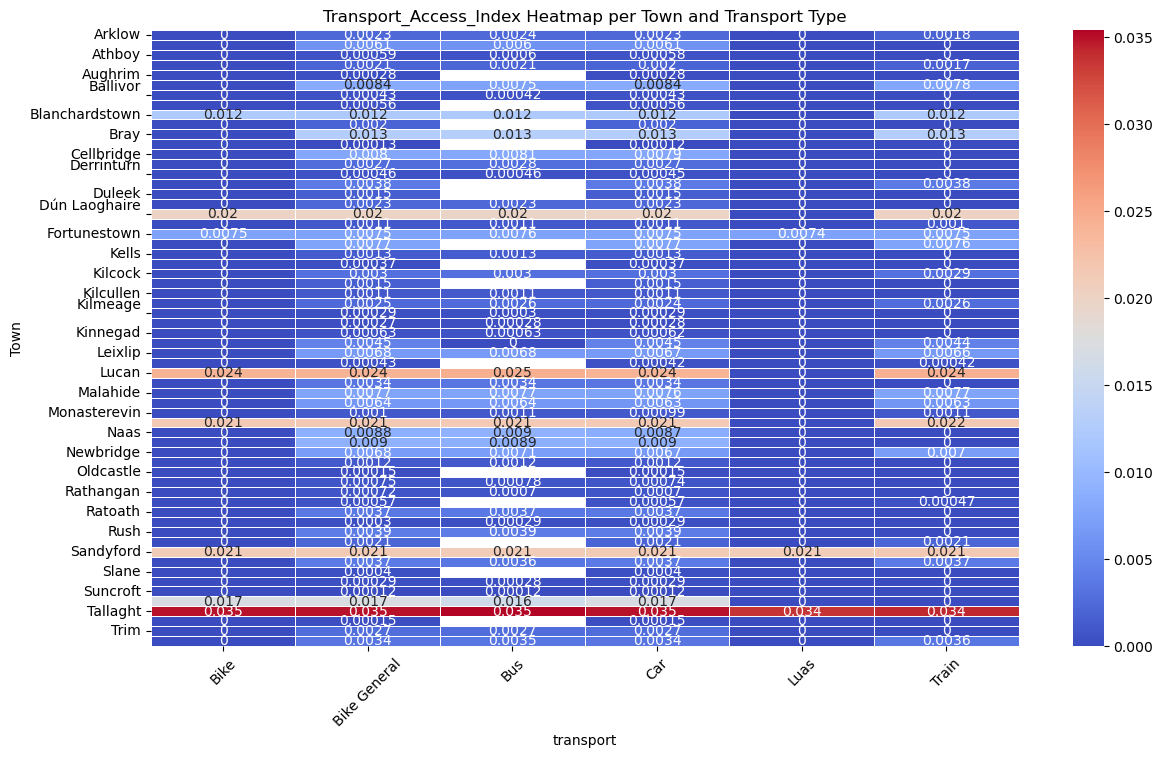

In [150]:
pivot_table = grouped_gdf.pivot(index="Town", columns="transport", values="Transport_Access_Index")
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Transport_Access_Index Heatmap per Town and Transport Type')
plt.xticks(rotation=45)
plt.show()

In [151]:
avg_accessibility_index = grouped_gdf.groupby('transport')['Transport_Access_Index'].mean().reset_index()
print("Promedio del Índice de Accesibilidad por Tipo de Transporte:")
print(avg_accessibility_index)

Promedio del Índice de Accesibilidad por Tipo de Transporte:
      transport  Transport_Access_Index
0          Bike                0.002557
1  Bike General                0.005029
2           Bus                0.006063
3           Car                0.005010
4          Luas                0.001001
5         Train                0.003672


In [152]:
avg_weighted_accessibility = grouped_gdf.groupby('transport')['Transport_Access_Index'].mean().reset_index()
print("Promedio de la Accesibilidad Ponderada por Tipo de Transporte:")
print(avg_weighted_accessibility)

Promedio de la Accesibilidad Ponderada por Tipo de Transporte:
      transport  Transport_Access_Index
0          Bike                0.002557
1  Bike General                0.005029
2           Bus                0.006063
3           Car                0.005010
4          Luas                0.001001
5         Train                0.003672


In [153]:
avg_cost = grouped_gdf.groupby('transport')['cost'].mean().reset_index()
print("Promedio del Costo por Tipo de Transporte:")
print(avg_cost)

Promedio del Costo por Tipo de Transporte:
      transport      cost
0          Bike  0.885821
1  Bike General  0.361277
2           Bus  0.344066
3           Car  0.365327
4          Luas  0.957797
5         Train  0.698374


In [154]:
population_stats = grouped_gdf.groupby('Town')['Population'].describe().reset_index()
print("Estadísticas Descriptivas de la Población por Ciudad:")
print(population_stats)

Estadísticas Descriptivas de la Población por Ciudad:
                       Town  count     mean        std      min      25%  \
0                    Arklow    6.0  13360.5  94.305355  13168.0  13399.0   
1                 Ashbourne    6.0  15680.0   0.000000  15680.0  15680.0   
2                    Athboy    6.0   2596.0   0.000000   2596.0   2596.0   
3                      Athy    6.0  11035.0   0.000000  11035.0  11035.0   
4                   Aughrim    5.0   1437.0   0.000000   1437.0   1437.0   
5                Balbriggan    6.0  24322.0   0.000000  24322.0  24322.0   
6                Ballivor\n    6.0   1870.0   0.000000   1870.0   1870.0   
7               Baltinglass    5.0   2611.0   0.000000   2611.0   2611.0   
8            Blanchardstown    6.0  28302.0   0.000000  28302.0  28302.0   
9               Blessington    5.0   5611.0   0.000000   5611.0   5611.0   
10                     Bray    6.0  33512.0   0.000000  33512.0  33512.0   
11                   Carnew    5.0

In [155]:
correlation_matrix = grouped_gdf[['Population', 'Transport_Access_Index']].corr()
print("Correlación entre Población and Transport_Access_Index:")
print(correlation_matrix)

Correlación entre Población and Transport_Access_Index:
                        Population  Transport_Access_Index
Population                1.000000                0.872985
Transport_Access_Index    0.872985                1.000000


In [156]:
std_accessibility_index = grouped_gdf.groupby('transport')['Transport_Access_Index'].std().reset_index()
print("Desviación Estándar del Índice de Transport_Access_Index por Tipo de Transporte:")
print(std_accessibility_index)

Desviación Estándar del Índice de Transport_Access_Index por Tipo de Transporte:
      transport  Transport_Access_Index
0          Bike                0.007245
1  Bike General                0.006972
2           Bus                0.007647
3           Car                0.006958
4          Luas                0.005069
5         Train                0.007071


In [157]:
total_population_by_town = grouped_gdf.groupby('Town')['Population'].sum().reset_index()
print("Total de la Población por Ciudad:")
print(total_population_by_town)

Total de la Población por Ciudad:
                       Town  Population
0                    Arklow       80163
1                 Ashbourne       94080
2                    Athboy       15576
3                      Athy       66210
4                   Aughrim        7185
5                Balbriggan      145932
6                Ballivor\n       11220
7               Baltinglass       13055
8            Blanchardstown      169812
9               Blessington       28055
10                     Bray      201072
11                   Carnew        6165
12               Cellbridge      123606
13                    Clane       48912
14             Derrinturn\n       11022
15                 Donabate       48345
16                   Duleek       24495
17             Dunshaughlin       39864
18          Dún Laoghaire\n      279618
19                  Enfield       21978
20             Fortunestown      108750
21               Greystones      110045
22                    Kells       39648
23    

In [158]:
total_weighted_accessibility_by_town = grouped_gdf.groupby('Town')['Transport_Access_Index'].sum().reset_index()
print("Total Transport_Access_Index by location:")
print(total_weighted_accessibility_by_town)

Total Transport_Access_Index by location:
                       Town  Transport_Access_Index
0                    Arklow                0.008963
1                 Ashbourne                0.018134
2                    Athboy                0.001761
3                      Athy                0.007810
4                   Aughrim                0.000557
5                Balbriggan                0.032078
6                Ballivor\n                0.001280
7               Baltinglass                0.001123
8            Blanchardstown                0.061237
9               Blessington                0.003909
10                     Bray                0.051913
11                   Carnew                0.000246
12               Cellbridge                0.023940
13                    Clane                0.008163
14             Derrinturn\n                0.001373
15                 Donabate                0.011343
16                   Duleek                0.003026
17             Dunshau

In [159]:
median_cost = grouped_gdf.groupby('transport')['cost'].median().reset_index()
print("Mediana del Costo por Tipo de Transporte:")
print(median_cost)

Mediana del Costo por Tipo de Transporte:
      transport      cost
0          Bike  1.000000
1  Bike General  0.351364
2           Bus  0.327696
3           Car  0.355403
4          Luas  1.000000
5         Train  1.000000


In [160]:
weighted_accessibility_stats = grouped_gdf.groupby('transport')['Transport_Access_Index'].describe().reset_index()
print("Estadísticas Descriptivas Completas de la Transport_Access_Index por Tipo de Transporte:")
print(weighted_accessibility_stats)

Estadísticas Descriptivas Completas de la Transport_Access_Index por Tipo de Transporte:
      transport  count      mean       std       min       25%       50%  \
0          Bike   62.0  0.002557  0.007245  0.000000  0.000000  0.000000   
1  Bike General   62.0  0.005029  0.006972  0.000119  0.000571  0.002340   
2           Bus   47.0  0.006063  0.007647  0.000000  0.000927  0.003022   
3           Car   62.0  0.005010  0.006958  0.000117  0.000568  0.002336   
4          Luas   62.0  0.001001  0.005069  0.000000  0.000000  0.000000   
5         Train   62.0  0.003672  0.007071  0.000000  0.000000  0.000000   

        75%       max  
0  0.000000  0.034902  
1  0.006793  0.034988  
2  0.007647  0.035425  
3  0.006709  0.034933  
4  0.000000  0.033714  
5  0.003765  0.034275  


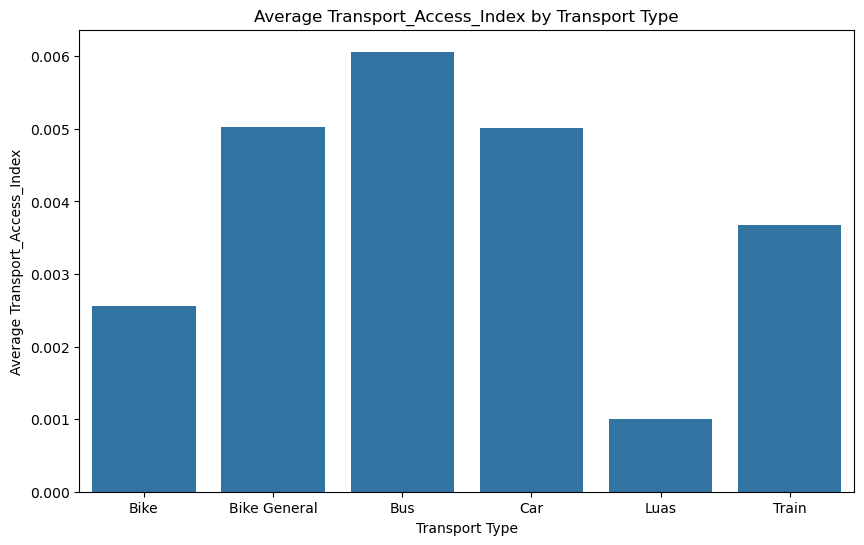

In [161]:
avg_accessibility_index = grouped_gdf.groupby('transport')['Transport_Access_Index'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_accessibility_index, x='transport', y='Transport_Access_Index')
plt.xlabel('Transport Type')
plt.ylabel('Average Transport_Access_Index')
plt.title('Average Transport_Access_Index by Transport Type')
plt.show()

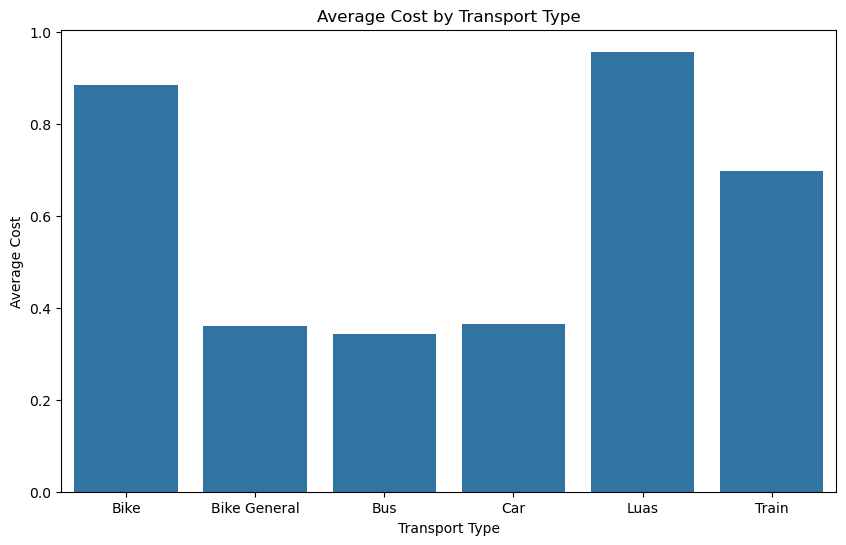

In [164]:
avg_cost = grouped_gdf.groupby('transport')['cost'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_cost, x='transport', y='cost')
plt.xlabel('Transport Type')
plt.ylabel('Average Cost')
plt.title('Average Cost by Transport Type')
plt.show()

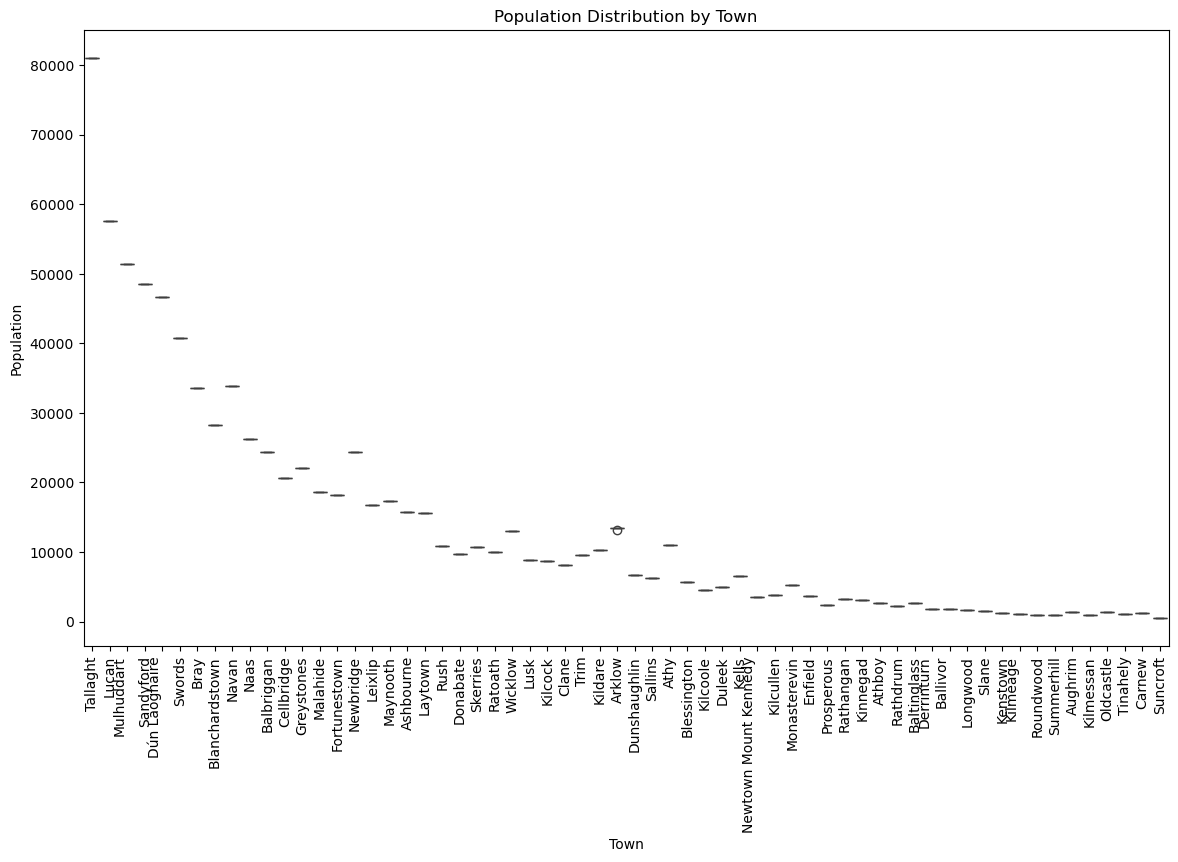

In [165]:
population_stats = grouped_gdf.groupby('Town')['Population'].describe().reset_index()
plt.figure(figsize=(14, 8))
sns.boxplot(data=grouped_gdf, x='Town', y='Population')
plt.xlabel('Town')
plt.ylabel('Population')
plt.title('Population Distribution by Town')
plt.xticks(rotation=90)
plt.show()

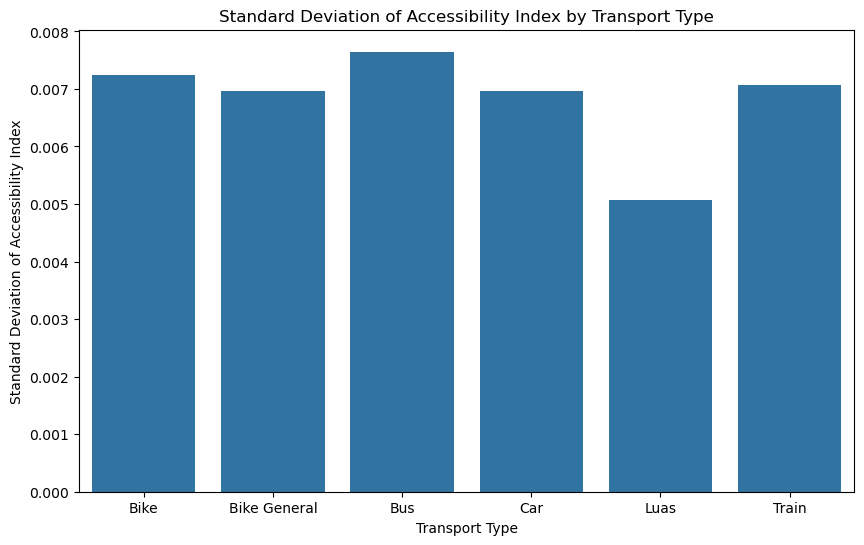

In [167]:
std_accessibility_index = grouped_gdf.groupby('transport')['Transport_Access_Index'].std().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=std_accessibility_index, x='transport', y='Transport_Access_Index')
plt.xlabel('Transport Type')
plt.ylabel('Standard Deviation of Accessibility Index')
plt.title('Standard Deviation of Accessibility Index by Transport Type')
plt.show()

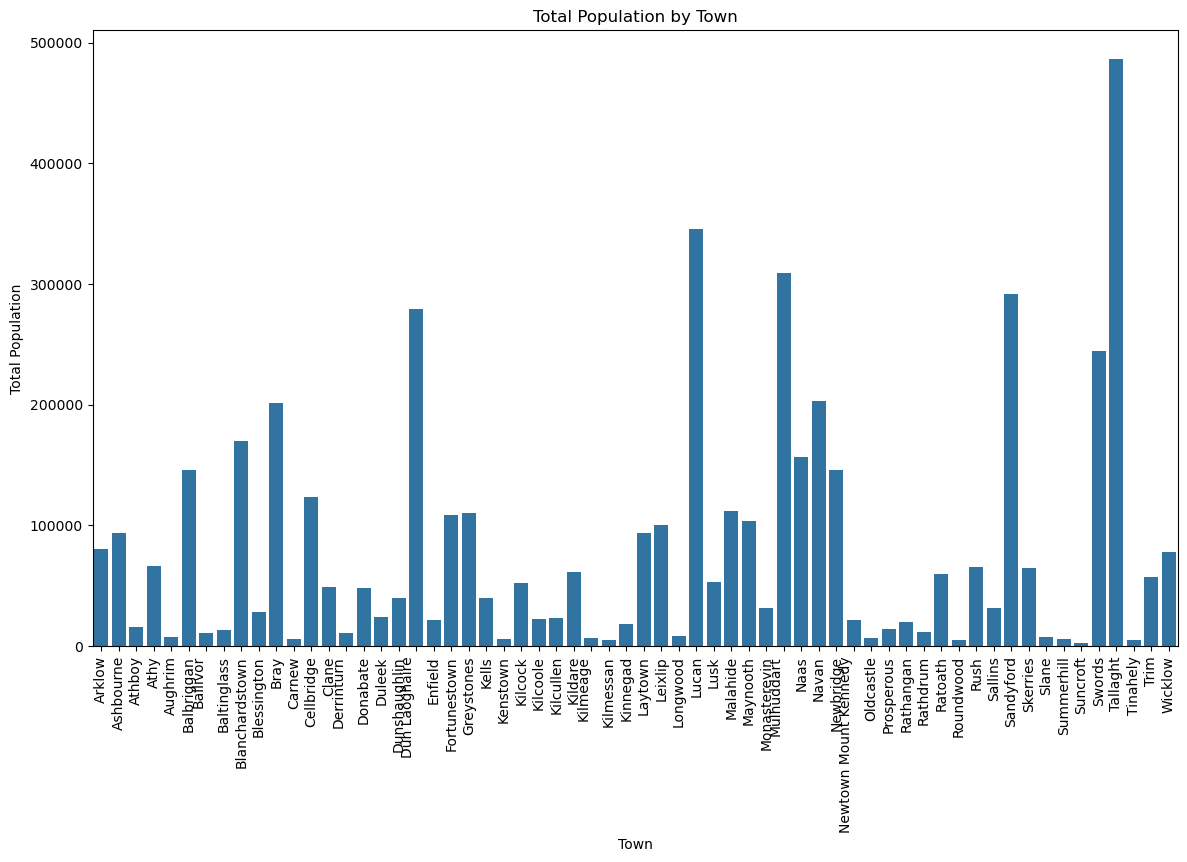

In [168]:
total_population_by_town = grouped_gdf.groupby('Town')['Population'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=total_population_by_town, x='Town', y='Population')
plt.xlabel('Town')
plt.ylabel('Total Population')
plt.title('Total Population by Town')
plt.xticks(rotation=90)
plt.show()

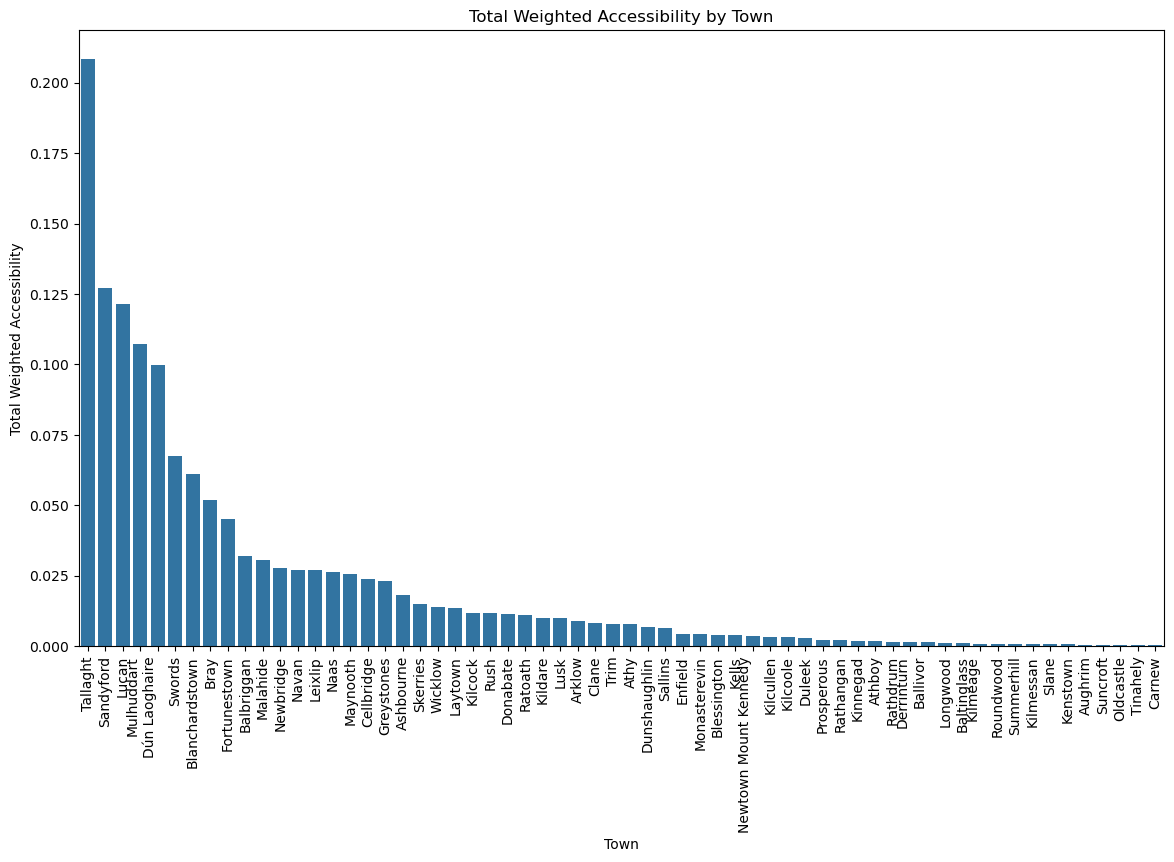

In [170]:
total_weighted_accessibility_by_town = grouped_gdf.groupby('Town')['Transport_Access_Index'].sum().reset_index()
total_weighted_accessibility_by_town = total_weighted_accessibility_by_town.sort_values(by='Transport_Access_Index', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=total_weighted_accessibility_by_town, x='Town', y='Transport_Access_Index')
plt.xlabel('Town')
plt.ylabel('Total Weighted Accessibility')
plt.title('Total Weighted Accessibility by Town')
plt.xticks(rotation=90)
plt.show()

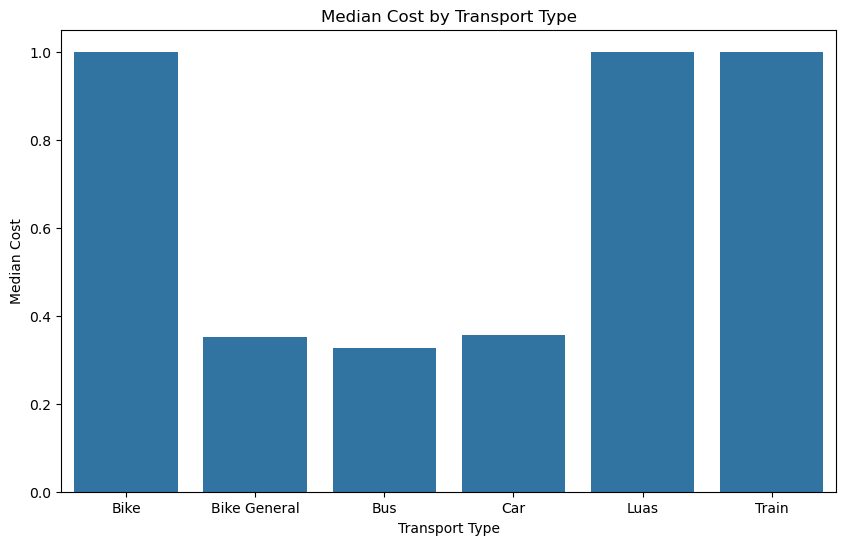

In [171]:
median_cost = grouped_gdf.groupby('transport')['cost'].median().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=median_cost, x='transport', y='cost')
plt.xlabel('Transport Type')
plt.ylabel('Median Cost')
plt.title('Median Cost by Transport Type')
plt.show()

In [172]:
weighted_accessibility_stats = grouped_gdf.groupby('transport')['Transport_Access_Index'].describe().reset_index()
print("Estadísticas Descriptivas Completas de la Accesibilidad Ponderada por Tipo de Transporte:")
print(weighted_accessibility_stats)

Estadísticas Descriptivas Completas de la Accesibilidad Ponderada por Tipo de Transporte:
      transport  count      mean       std       min       25%       50%  \
0          Bike   62.0  0.002557  0.007245  0.000000  0.000000  0.000000   
1  Bike General   62.0  0.005029  0.006972  0.000119  0.000571  0.002340   
2           Bus   47.0  0.006063  0.007647  0.000000  0.000927  0.003022   
3           Car   62.0  0.005010  0.006958  0.000117  0.000568  0.002336   
4          Luas   62.0  0.001001  0.005069  0.000000  0.000000  0.000000   
5         Train   62.0  0.003672  0.007071  0.000000  0.000000  0.000000   

        75%       max  
0  0.000000  0.034902  
1  0.006793  0.034988  
2  0.007647  0.035425  
3  0.006709  0.034933  
4  0.000000  0.033714  
5  0.003765  0.034275  


In [173]:
# Import necessary libraries
from scipy.stats import pearsonr

corr, p_val = pearsonr(grouped_gdf['Population'], grouped_gdf['Transport_Access_Index'])
print(f"Correlación de Pearson: r={corr}, p={p_val}")

Correlación de Pearson: r=0.8729847998675491, p=9.870758278622556e-113


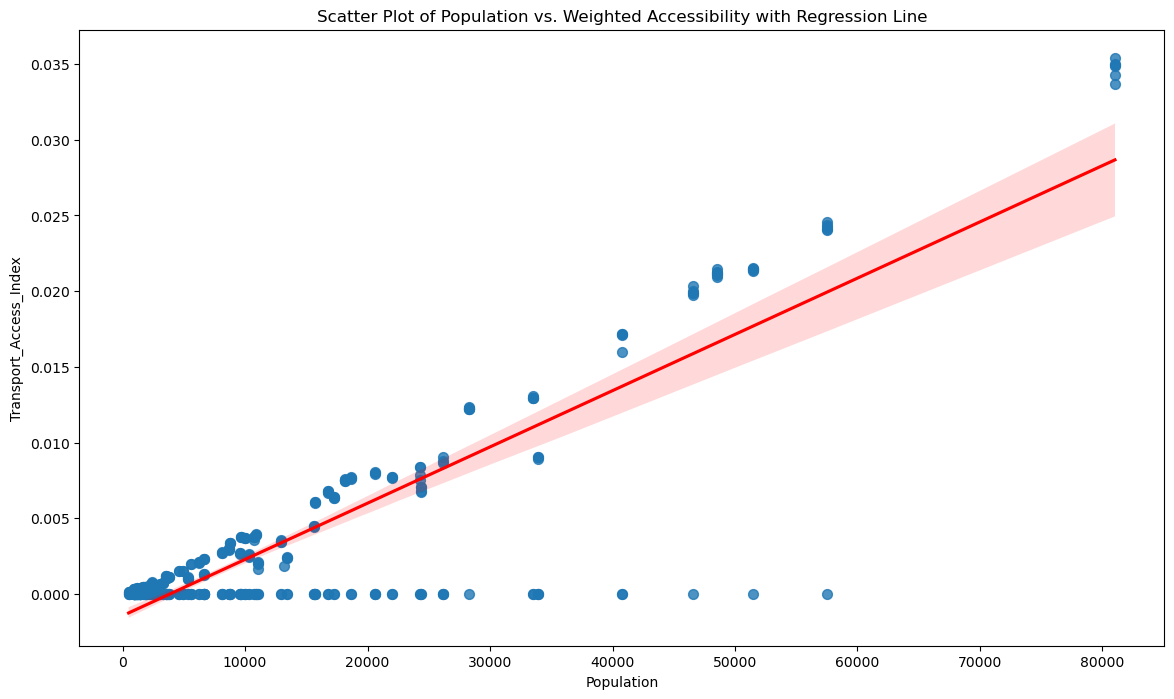

In [174]:
plt.figure(figsize=(14, 8))
sns.regplot(data=grouped_gdf, x='Population', y='Transport_Access_Index', scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xlabel('Population')
plt.ylabel('Transport_Access_Index')
plt.title('Scatter Plot of Population vs. Weighted Accessibility with Regression Line')
plt.show()

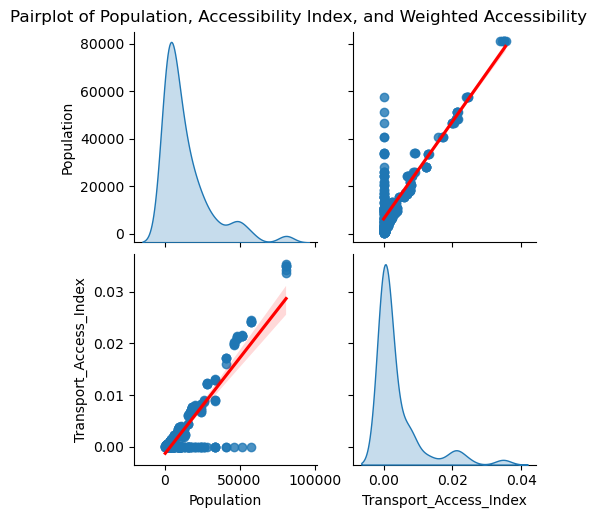

In [176]:
sns.pairplot(grouped_gdf[['Population', 'Transport_Access_Index']], kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Pairplot of Population, Accessibility Index, and Weighted Accessibility', y=1.02)
plt.show()

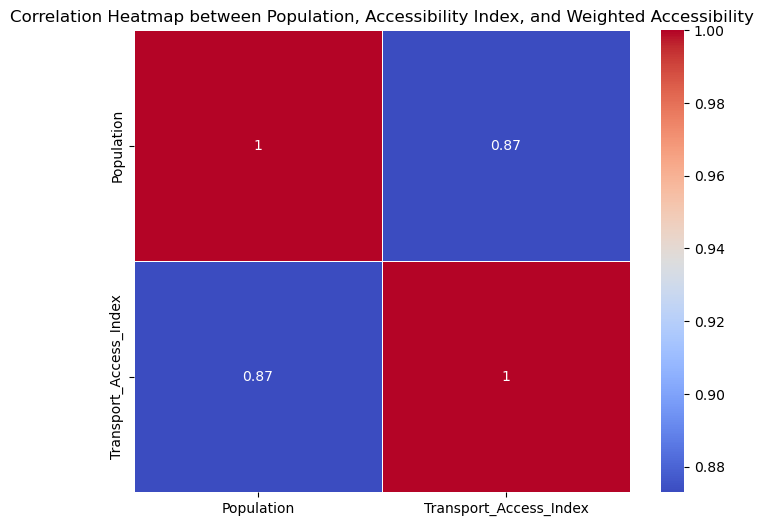

In [177]:
correlation_matrix = grouped_gdf[['Population', 'Transport_Access_Index']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between Population, Accessibility Index, and Weighted Accessibility')
plt.show()